In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers, initializers, activations
from tensorflow.keras.applications import resnet, resnet50
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
df1 = pd.read_csv("Xvals.csv")
df2 = pd.read_csv("yvals.csv")

df1.head(n=5)

,y_values,Fz,Cz,Pz,Oz,P3,P4,PO7,PO8
0,0,-1.21980,-0.32769,-1.2200,2.4115,0.057031,-2.6568,7.3720,-0.2789
1,0,-1.42620,-4.19000,-5.6546,-7.7161,-5.435900,-9.4553,-3.6705,-5.4851
2,0,-1.31520,-6.87080,-8.5599,-14.7390,-9.180800,-14.2680,-11.6320,-8.9290
3,0,-0.53987,-7.51560,-8.9646,-16.6560,-10.119000,-15.7910,-14.6160,-9.4095
4,0,1.04730,-6.01770,-6.9994,-13.5930,-8.419400,-13.9980,-12.8380,-6.8776


In [3]:
df1.describe()

,y_values,Fz,Cz,Pz,Oz,P3,P4,PO7,PO8
count,347704.000000,347704.000000,347704.000000,347704.000000,347704.000000,347704.000000,347704.000000,347704.000000,347704.000000
mean,0.450958,0.000392,0.000021,-0.000051,-0.000074,0.000008,-0.000381,-0.000009,0.000032
std,0.613548,10.200343,9.888067,10.770510,14.782461,10.338669,11.317850,14.941657,12.338641
min,0.000000,-85.477000,-69.779000,-68.799000,-94.923000,-62.743000,-64.663000,-89.859000,-81.257000
25%,0.000000,-6.200225,-6.245400,-6.732625,-9.209625,-6.462525,-7.204500,-9.628425,-7.742300
50%,0.000000,-0.065023,-0.061193,-0.126355,-0.520000,-0.154045,-0.169555,-0.381100,-0.284810
75%,1.000000,6.049500,6.093400,6.579000,8.640625,6.262925,6.996700,9.184700,7.443250
max,2.000000,97.422000,59.585000,56.980000,99.407000,66.195000,60.096000,97.890000,74.633000


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler

target_stimulus_num = np.unique(df1['y_values'])
print(target_stimulus_num)
print("Number of Stimulus Targets: {}".format(len(target_stimulus_num)))

[0 1 2]
Number of Stimulus Targets: 3


In [5]:
target_stim_0 = df1[df1['y_values'] == 0]
print("Number of Target_Stimulus_0 Detected: {}".format(len(target_stim_0)))

target_stim_1 = df1[df1['y_values'] == 1]
print("Number of Target_Stimulus_1 Detected: {}".format(len(target_stim_1)))

target_stim_2 = df1[df1['y_values'] == 2]
print("Number of Target_Stimulus_2 Detected: {}".format(len(target_stim_2)))


Number of Target_Stimulus_0 Detected: 213304
Number of Target_Stimulus_1 Detected: 112000
Number of Target_Stimulus_2 Detected: 22400


<BarContainer object of 3 artists>

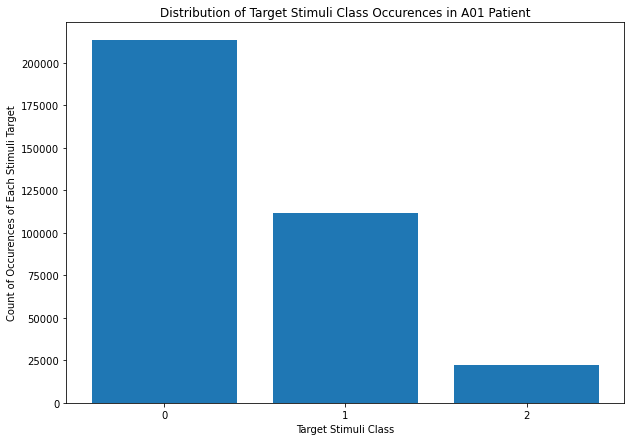

In [6]:
count = [213304, 112000, 22400]
target_stimuli = ["0", "1", "2"]

plt.figure(figsize = (10, 7))
plt.title("Distribution of Target Stimuli Class Occurences in A01 Patient")
plt.xlabel("Target Stimuli Class")
plt.ylabel("Count of Occurences of Each Stimuli Target")
plt.bar(target_stimuli, count)

In [7]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [8]:
train_df = df1
targets_df = df1['y_values']

train_df.drop(['y_values'], axis = 1, inplace = True)

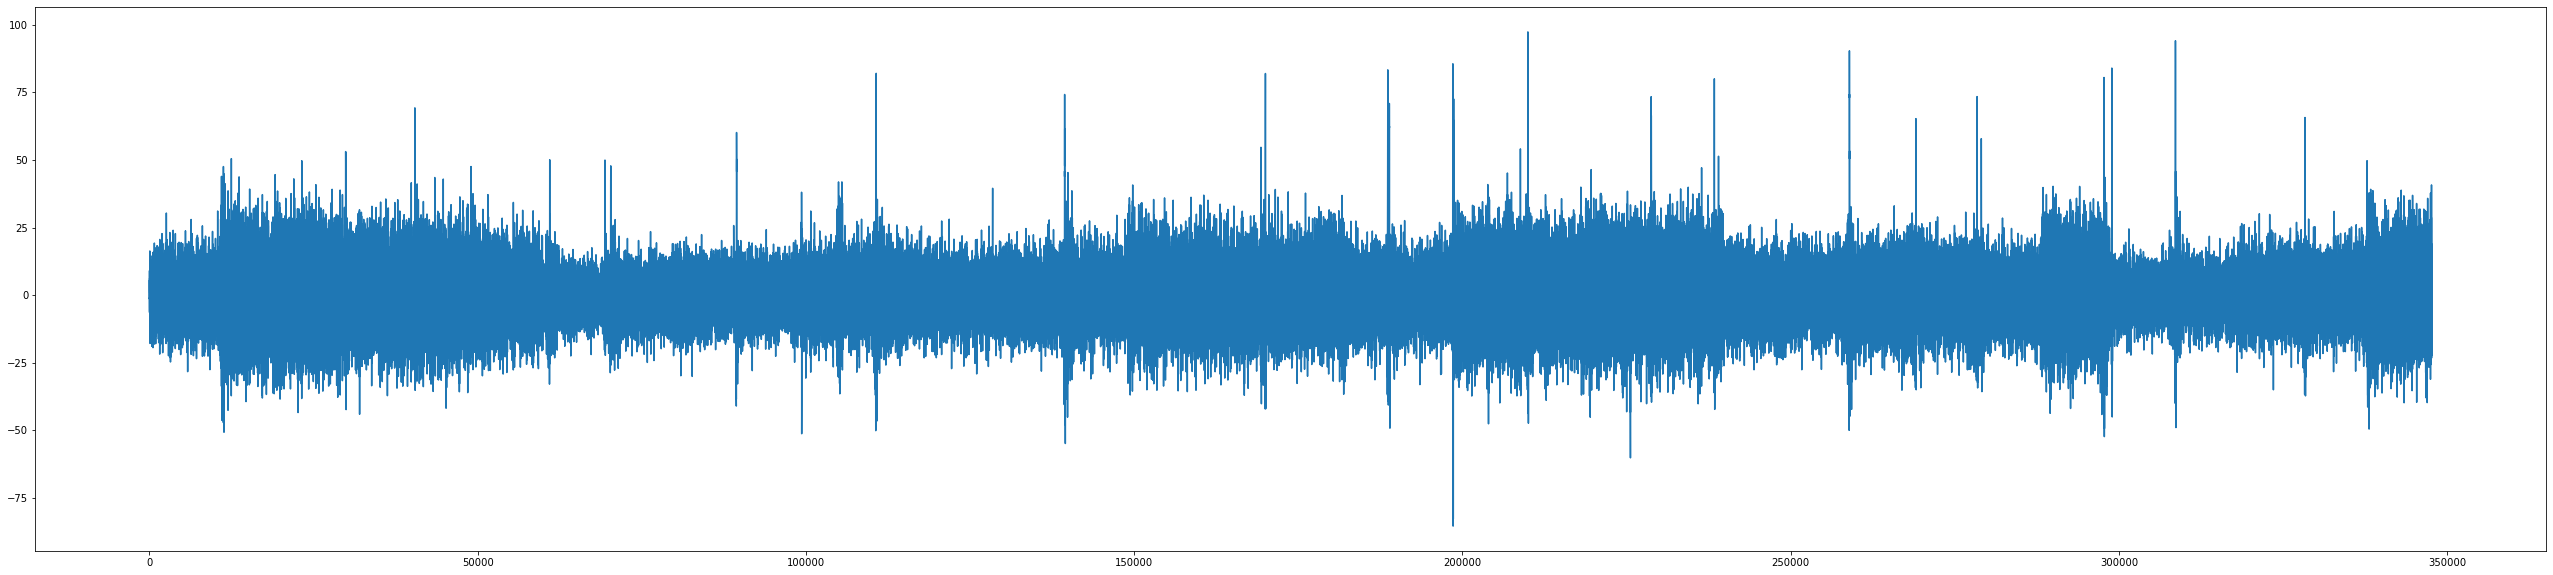

In [9]:
plt.figure(figsize = (45, 10))
plt.plot(train_df['Fz'])

In [10]:
print("The Training DataFrame has shape {}".format(train_df.shape), "and the target stimuli DataFrame has shape {}".format(targets_df.shape))

The Training DataFrame has shape (347704, 8) and the target stimuli DataFrame has shape (347704,)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(train_df, 
targets_df, test_size = 0.2, random_state = 0)

encoder_inputs = tf.keras.layers.Input(shape=(X_train.shape))
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)

model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)
model_e1d1.summary()

NameError: name 'n_future' is not defined